<font size = 5> Data Hawk Data Analyst Home Project </font>

**Author:** Tristan Joshua Alba  
**Date:** May 30, 2022

This notebook contains analysis and solution to the <a href= 'https://datahawk.notion.site/Data-Analyst-Home-Project-faf2ccc69dd142719043ae07fddd077b'>Data Analyst Home Project</a> from DataHawk. The project can be broken down into three parts: 
1. SQL Proficiency
2. Data Analysis Case Study
3. Spreadsheet/Excel or BI Knowledge

In [62]:
# Importing Preliminaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# SQL Proficiency

## Setting up SQLite3 Functions

In [2]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ Create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn
            
def create_table(conn, create_table_script):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_script: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_script)
    except Error as e:
        print(e)

def execute_sql(conn, sql_script, cols):
    """ Execute SQL script and display results
        as a dataframe
    :param conn: Connection object
    :param sql_script: SQL SELECT statement
    :param cols: Column anmes
    :return: DataFrame
    """
    curs = conn.cursor()
    curs.execute(sql_script)
    records = curs.fetchall()
    return pd.DataFrame(records,columns=cols)

## Creating SQL tables

In [4]:
# Oct 2020 Advertising data
df_ads = pd.read_csv('Advertising-Oct-2020.csv')

# Oct 2020 Sales Data
df_sales = pd.read_csv('Sales-Oct-2020.csv')

In [5]:
df_ads.dtypes

AccountId         object
Marketplace       object
Clicks           float64
Costs            float64
Impressions      float64
ReportDate        object
Sales            float64
SponsoredType     object
TimeId             int64
UnitsSold        float64
dtype: object

In [6]:
df_sales.dtypes

AccountId       object
Marketplace     object
Orders           int64
ProductId        int64
Quantity         int64
ReportDate      object
Sales          float64
TimeId           int64
dtype: object

In [7]:
create_table_sales = """ CREATE TABLE IF NOT EXISTS sales_oct_2020 (
                                        AccountID text PRIMARY KEY,
                                        Marketplace text,
                                        Orders Integer,
                                        ProductId text,
                                        Quantity Integer,
                                        ReportDate text,
                                        Sales Real,
                                        TimeId text
                                    ); """

create_table_ads = """ CREATE TABLE IF NOT EXISTS ads_oct_2020 (
                                        AccountID text PRIMARY KEY,
                                        Marketplace text,
                                        Clicks Real,
                                        Costs Real,
                                        Impressions Real,
                                        ReportDate text,
                                        SponsoredType text,
                                        TimeId text,
                                        UnitsSold Real
                                    ); """

In [8]:
database = r"datahawk.db"

# create a database connection
db = create_connection(database) ## connection object

# # create tables
if db is not None:
    # create sales table
    create_table(db, create_table_sales)

    # create ads table
    create_table(db, create_table_ads)
else:
    print("Error! cannot create the database connection.")

## Inserting data into SQL tables

In [9]:
df_sales.to_sql('sales_oct_2020', db, if_exists='replace', index=False)

439706

In [10]:
df_ads.to_sql('ads_oct_2020', db, if_exists='replace', index=False)

32579

### Checking if data is inserted

In [30]:
execute_sql(db, """

    SELECT 
        * 
    FROM ads_oct_2020 
    LIMIT 10
    
""", cols = df_ads.columns)

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/12/2020,0.0,SponsoredBrands,71072,0.0
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/13/2020,0.0,SponsoredBrands,71821,0.0
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/14/2020,0.0,SponsoredBrands,72577,0.0
3,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/15/2020,0.0,SponsoredBrands,73326,0.0
4,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/16/2020,0.0,SponsoredBrands,74082,0.0
5,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/17/2020,0.0,SponsoredBrands,74838,0.0
6,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/18/2020,0.0,SponsoredBrands,75615,0.0
7,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/19/2020,0.0,SponsoredBrands,76364,0.0
8,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.0,0.0,0.0,10/20/2020,0.0,SponsoredBrands,77113,0.0
9,685C38C40E63205C75D4226CB737E7F5,Amazon - United States,0.0,0.0,0.0,10/12/2020,0.0,SponsoredBrands,71074,0.0


## Exploring the Data

The two tables have the following metadata:

**Sales-Oct-2020** → Shows sales data on Amazon (Dawn.AmazonMWSSales) for October 2020

- **AccountId :** unique identifier of a Seller/Vendor on Amazon

- **Marketplace** : name of the Amazon Marketplace it refers to

- **Orders :** Number of Orders

- **ProductId :** Unique identifier of the product sold

- **Quantity :** Number of product sold

- **ReportDate :** Date of the purchase

- **Sales :** Total sales in dollars-
- **TimeId :** unique identifier of time

**Advertising-Oct-2020** → Advertising data on Amazon (Dawn.tAmazonAdvertising) for October 2020

- **AccountId** : unique identifier of a Seller/Vendor on Amazon

- **Marketplace** : name of the Amazon Marketplace it refers to 

- **Clicks** : number of clicks the advertising generated

- **Costs** : How much the advertising cost

- **Impressions** : Number of views of the advertising

- **ReportDate** : date of the advertising

- **Sales** : Total sales in dollars generated by advertising

- **UnitsSold** : Total unit sold generated by the advertising

- **SponsoredType** : Type of advertising strategy used (3 possible types)

- **TimeId** : unique identifier of time


### Checking row count

In [91]:
execute_sql(db, """
    SELECT
        'Sales'
        , COUNT(*) as CountRows
    FROM sales_oct_2020
    
    UNION
    
    SELECT
        'Ads'
        , COUNT(*) as CountRows
    FROM ads_oct_2020
    
""", cols = ['Table', 'CountRows'])

,Table,CountRows
0,Ads,32579
1,Sales,439706


### Checking for NULLS
There are no NULL rows for both tables.

In [90]:
execute_sql(db, """

    SELECT 
        'Sales'
        , COUNT(*) as CountNullRows
    FROM sales_oct_2020 
    WHERE AccountID is null
    
    UNION 
    
    SELECT 
        'Ads'
        , COUNT(*) as CountNullRows
    FROM ads_oct_2020 
    WHERE AccountID is null
    
""", cols = ['Table', 'CountNullRows'])

,Table,CountNullRows
0,Ads,0
1,Sales,0


### Checking distinct values

In [89]:
execute_sql(db, """

    SELECT 
        'Sales'
        , COUNT(DISTINCT AccountId) as CountAccountId
    FROM sales_oct_2020 
    
    UNION 
    
    SELECT 
        'Ads'
        , COUNT(DISTINCT AccountId) as CountAccountId
    FROM ads_oct_2020 
    
""", cols = ['Table', 'CountAccountId'])

,Table,CountAccountId
0,Ads,819
1,Sales,583


### Checking top marketplaces

In [88]:
execute_sql(db, """

    SELECT 
        Marketplace
        , COUNT(DISTINCT AccountId) as CountAccountId
        , SUM(Orders) as TotalOrders
        , COUNT(DISTINCT ProductId) as CountProductId
        , SUM(Quantity) as TotalQuantity
        , SUM(Sales) as TotalSales
    FROM sales_oct_2020 
    GROUP BY Marketplace
    ORDER BY TotalSales DESC
    
""", cols = ['marketplace', 'CountAccountId', 'TotalOrders', 'CountProductId',
             'TotalQuantity', 'TotalSales'])

,marketplace,CountAccountId,TotalOrders,CountProductId,TotalQuantity,TotalSales
0,Amazon - United States,322,2904724,43689,3137702,8.988029e+07
1,Amazon - India,39,99034,7486,105711,5.407846e+07
2,Amazon - Germany,146,170247,5827,184256,1.116971e+07
3,Amazon - Mexico,53,9967,1584,10823,9.079242e+06
4,Amazon - United Kingdom,108,218447,7425,240887,6.270264e+06
5,Amazon - Canada,118,78097,4153,83517,3.027230e+06
6,Amazon - Italia,88,43944,2026,46964,2.641114e+06
7,Amazon - Spain,89,36492,2715,38373,2.523127e+06
8,Amazon - France,98,47998,6383,52546,2.244418e+06


### Checking top accounts

In [87]:
execute_sql(db, """

    SELECT 
        AccountId
        , COUNT(DISTINCT Marketplace) as CountMarketplace
        , SUM(Orders) as TotalOrders
        , COUNT(DISTINCT ProductId) as CountProductId
        , SUM(Quantity) as TotalQuantity
        , SUM(Sales) as TotalSales
    FROM sales_oct_2020 
    GROUP BY AccountId
    ORDER BY TotalSales DESC
    LIMIT 10
    
""", cols = ['account_id', 'CountMarketplace', 'TotalOrders', 'CountProductId',
             'TotalQuantity', 'TotalSales'])

,account_id,CountMarketplace,TotalOrders,CountProductId,TotalQuantity,TotalSales
0,008870D0F02C751E19000BD81A1017B7,1,14921,774,15046,9018728.58
1,06E727F92F603671473027FADA130A1D,3,274663,284,285184,8268160.47
2,8909D4C272FCF4C36843F468B2513896,5,24720,80,28973,8228513.18
3,97248E0534156D06FE220B2A6F7F6581,1,11253,190,12071,7174364.00
4,0FF29C37747D6527E702A3D80DD7A3A2,1,8336,1508,9378,5736446.00
5,B3E50C8CAC3B505F4866DB9D3A5DA08D,1,26781,484,27674,5530270.00
6,1F94AE26BA8273C7C6A5CF898C4C6CC8,3,143424,358,156376,5261852.15
7,D0DA3A793C18025106011B5E0EB7706B,2,202242,21,215842,5099831.66
8,AF94AC9C51032858E60C15251C368709,1,12782,87,13102,5073068.00
9,777A623A3D69F5E62E044CF69B526B13,5,16843,465,17095,4356808.79


### Checking SponsoredTypes

In [92]:
execute_sql(db, """

    SELECT 
        SponsoredType
        , COUNT(DISTINCT AccountId) as CountAccountId
    FROM ads_oct_2020 
    GROUP BY SponsoredType 
    
""", cols = ['SponsoredType','CountAccountId'])

,SponsoredType,CountAccountId
0,SponsoredBrands,438
1,SponsoredDisplay,230
2,SponsoredProducts,807


## SQL Proficiency

### Top 10 Sellers that used the SponsoredType *'SponsoredProducts*' ordered by the number of orders descending
In order to solve this question, we first get all the accounts that used the `SponsoredType = 'SponsoredProducts'` and get the intersection of these accounts with another subquery that aggregates sales and order. Next, we order in descending order by the total sales.

In [36]:
execute_sql(db, """

    SELECT 
        AccountId
    FROM ads_oct_2020 
    WHERE SponsoredType = 'SponsoredProducts'
    GROUP BY AccountId
    LIMIT 10
    
""", cols = ['AccountId'])

,AccountId
0,0103E4C83489E41B5EA0F95C47747713
1,0184DE1D1C965FA66B2813C95DEC665B
2,01B0D2D34970CDD119ED726BC539F715
3,0219D53759C0314C87EB2C3CD07E8852
4,0242FED5C941AC4CC38B20C0BF7F7BDE
5,025A8B557AD4A7E8058415C624577947
6,025D748F1BB83B254430884B90CD5C82
7,029B18D3723CF10C4A5FC1431776C57B
8,02B0251AE8C2F03AE5414E270F2760B4
9,02D66B7CED2D3AC59AF61D6620D995DC


In [85]:
execute_sql(db, """
    
    SELECT
        sales.AccountId 
        , TotalSales
        , CountOrders
    FROM (SELECT
            AccountId
            , SUM(Sales) as TotalSales
            , SUM(Orders) as CountOrders
        FROM sales_oct_2020
        GROUP BY AccountId) AS sales
    
    INNER JOIN (SELECT 
                    AccountId
                FROM ads_oct_2020 
                WHERE SponsoredType = 'SponsoredProducts'
                GROUP BY AccountId) AS sp
    ON sales.AccountId = sp.AccountId
    ORDER BY TotalSales DESC
    LIMIT 10
    
""", cols = ['AccountId','TotalSales','CountOrders'])

,AccountId,TotalSales,CountOrders
0,06E727F92F603671473027FADA130A1D,8268160.47,274663
1,8909D4C272FCF4C36843F468B2513896,8228513.18,24720
2,B3E50C8CAC3B505F4866DB9D3A5DA08D,5530270.00,26781
3,1F94AE26BA8273C7C6A5CF898C4C6CC8,5261852.15,143424
4,3FCEA01768247A053886A7F6FD4EFFDF,3338925.11,46894
5,1AAD06105CE67EFAF2941549AD57D062,2696818.00,1687
6,71503764150DF0EEF0F5D92F53BDD6D7,2517490.00,5047
7,3FC56E46907DEB082667D2324699D680,2516216.30,51491
8,035A61ECF161CC57244D8DF01530C466,2426981.49,44214
9,49A5926E680E2AF8F70CE248823B4C9E,2170749.70,62922


### Average price per Marketplace per day
Average price can be calculated in two ways: (1) per products sold (using Quantity), or (2) per order (using Orders). We group by on Marketplace and ReportDate, and order by date. 

In [83]:
execute_sql(db, """
    
    SELECT
        Marketplace
        , ReportDate
        , AVG(Sales/Quantity) AS AvgPriceProduct
        , AVG(Sales/Orders) AS AvgPriceOrder
    FROM sales_oct_2020
    GROUP BY Marketplace, ReportDate
    ORDER BY Marketplace, ReportDate ASC
    
""", cols = ['Marketplace','ReportDate','AvgPriceProduct','AvgPriceOrder'])

,Marketplace,ReportDate,AvgPriceProduct,AvgPriceOrder
0,Amazon - Canada,2020-10-01,41.954859,46.147190
1,Amazon - Canada,2020-10-02,44.898786,47.622804
2,Amazon - Canada,2020-10-03,39.438025,43.054963
3,Amazon - Canada,2020-10-04,38.874239,40.358176
4,Amazon - Canada,2020-10-05,41.323076,45.055724
...,...,...,...,...
175,Amazon - United States,2020-10-16,39.314317,43.845624
176,Amazon - United States,2020-10-17,37.771116,40.681794
177,Amazon - United States,2020-10-18,37.689397,40.969255
178,Amazon - United States,2020-10-19,39.267560,43.982709


-------

# Data Analysis Case Study: Amazon Prime Day 2020

**Using the same dataset as the previous question**, go through the following case study:

"*Amazon Prime Day is an annual deal event exclusively for Prime members, delivering two days of epic deals on products on all kind of businesses and brands"*

Prime Day 2021 is happening in a couple of months and the **marketing team** of DataHawk would like you to give them **insights** about what will probably happen and **some cool visuals** to show customers at their upcoming webinar.

In order to do that, you base your analysis on the last Prime Day which happened on the 13th and 14th of October 2020. You should focus your analysis on the USA marketplace.

Prepare a document/presentation for the marketing team and answer the following questions:

Here are some questions that can guide your analysis:

- What is the impact of Prime Day on Sales? Quantity?
- Is advertising worth it for this kind of event? (Using *Advertising-Oct-2020* table)
- Which kind of advertising (*SponsoredType*) worked best in Prime Day 2020? (You can use [Advertising Cost of Sales](https://datahawk.co/blog/amazon-acos-vs-roas#1) for this)

Any additional information/kpis/investigation that you feel relevant for this analysis is welcomed.

*To answer to this case study, you can use SQL, Python, Spreadsheets or BI tools.*

In [93]:
df_sales.head()

,AccountId,Marketplace,Orders,ProductId,Quantity,ReportDate,Sales,TimeId
0,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072757000,1,2020-10-01,8.80,62746
1,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072649175,1,2020-10-01,20.99,62746
2,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,5,-1072649173,5,2020-10-01,49.95,62746
3,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Italia,1,-1072643743,3,2020-10-01,44.70,62746
4,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - United Kingdom,1,-1072638147,1,2020-10-01,7.99,62742


In [52]:
# Distinct Marketplaces
df_sales['Marketplace'].value_counts()

Amazon - United States     283367
Amazon - United Kingdom     38492
Amazon - Germany            31035
Amazon - India              28796
Amazon - France             17892
Amazon - Canada             17185
Amazon - Spain               9841
Amazon - Italia              8830
Amazon - Mexico              4268
Name: Marketplace, dtype: int64

In [53]:
df_sales.describe()

,Orders,ProductId,Quantity,Sales,TimeId
count,439706.000000,4.397060e+05,439706.000000,4.397060e+05,439706.000000
mean,8.207643,-1.027372e+08,8.871334,4.114428e+02,70002.323493
std,237.828062,6.509628e+08,256.113214,6.491420e+03,4350.872425
min,1.000000,-1.092463e+09,1.000000,0.000000e+00,62741.000000
25%,1.000000,-7.096216e+08,1.000000,2.595000e+01,66529.000000
50%,2.000000,5.035340e+05,2.000000,6.000000e+01,70325.000000
75%,4.000000,2.308461e+06,5.000000,2.049500e+02,74081.000000
max,152293.000000,2.140305e+09,164263.000000,3.493876e+06,77117.000000


In [95]:
str(datetime.timedelta(seconds = 68000))

'18:53:20'

In [97]:
## Storing df_sales in a temp DataFrame
df_sales_ = df_sales

In [98]:
## Cleaning up TimeId column and separating into hour, minute, and seconds column
df_sales_.head()


,AccountId,Marketplace,Orders,ProductId,Quantity,ReportDate,Sales,TimeId
0,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072757000,1,2020-10-01,8.80,62746
1,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072649175,1,2020-10-01,20.99,62746
2,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,5,-1072649173,5,2020-10-01,49.95,62746
3,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Italia,1,-1072643743,3,2020-10-01,44.70,62746
4,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - United Kingdom,1,-1072638147,1,2020-10-01,7.99,62742


In [103]:
Hour = [str(datetime.timedelta(seconds = x)).split(':')[0] for x in df_sales_.TimeId]
Minute = [str(datetime.timedelta(seconds = x)).split(':')[1] for x in df_sales_.TimeId]
Seconds = [str(datetime.timedelta(seconds = x)).split(':')[2] for x in df_sales_.TimeId]

In [104]:
df_sales_['Hour'] = Hour
df_sales_['Minute'] = Minute
df_sales_['Seconds'] = Seconds

In [105]:
df_sales_.head()

,AccountId,Marketplace,Orders,ProductId,Quantity,ReportDate,Sales,TimeId,Hour,Minute,Seconds
0,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072757000,1,2020-10-01,8.80,62746,17,25,46
1,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072649175,1,2020-10-01,20.99,62746,17,25,46
2,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,5,-1072649173,5,2020-10-01,49.95,62746,17,25,46
3,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Italia,1,-1072643743,3,2020-10-01,44.70,62746,17,25,46
4,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - United Kingdom,1,-1072638147,1,2020-10-01,7.99,62742,17,25,42


In [887]:
df_ads.head()

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/12/2020,0.00,SponsoredBrands,71072,0.00
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/13/2020,0.00,SponsoredBrands,71821,0.00
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/14/2020,0.00,SponsoredBrands,72577,0.00
3,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/15/2020,0.00,SponsoredBrands,73326,0.00
4,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/16/2020,0.00,SponsoredBrands,74082,0.00


In [890]:
## Cleaning up Advertisting Table Hour/Minute/Second columns
df_ads_ = df_ads

Hour = [str(datetime.timedelta(seconds = x)).split(':')[0] for x in df_ads_.TimeId]
Minute = [str(datetime.timedelta(seconds = x)).split(':')[1] for x in df_ads_.TimeId]
Seconds = [str(datetime.timedelta(seconds = x)).split(':')[2] for x in df_ads_.TimeId]

df_ads_['Hour'] = Hour
df_ads_['Minute'] = Minute
df_ads_['Seconds'] = Seconds

df_ads_.head()

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/12/2020,0.00,SponsoredBrands,71072,0.00,19,44,32
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/13/2020,0.00,SponsoredBrands,71821,0.00,19,57,01
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/14/2020,0.00,SponsoredBrands,72577,0.00,20,09,37
3,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/15/2020,0.00,SponsoredBrands,73326,0.00,20,22,06
4,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,10/16/2020,0.00,SponsoredBrands,74082,0.00,20,34,42


In [904]:
## Querying ReportDate values prior to Prime Day
### Tricky Format: It can be observed below how ReportDate for days before Oct 10, follow the mm/d/yyyy 
###                in contrast to the following dates written as mm/dd/yyyy

df_ads.sort_values(by='ReportDate', ascending = True)[:5]

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds
19502,55F74E3A44917896E1F33337B64443F3,Amazon - Germany,392.00,132.87,"79,328.00",10/1/2020,271.08,SponsoredProducts,62746,11.00,17,25,46
21544,432540AFBB9EA3E17AA4E3D476C4674D,Amazon - Germany,543.00,540.06,"161,123.00",10/1/2020,"1,527.73",SponsoredProducts,62746,99.00,17,25,46
21543,432540AFBB9EA3E17AA4E3D476C4674D,Amazon - France,502.00,368.50,"86,612.00",10/1/2020,"1,750.82",SponsoredProducts,62746,96.00,17,25,46
21542,432540AFBB9EA3E17AA4E3D476C4674D,Amazon - United Kingdom,"1,483.00","1,021.79","757,081.00",10/1/2020,"4,819.20",SponsoredProducts,62742,385.00,17,25,42
9598,38A6B2824683FCFAAAEB43E77ACAE2FE,Amazon - France,22.00,14.70,"21,557.00",10/1/2020,49.99,SponsoredDisplay,62746,1.00,17,25,46


In [907]:
## Cleaning up ReportDate
FormattedReportDate = []

for i in range(len(df_ads_)):
    if len(df_ads_['ReportDate'][i]) == 10:
    
        FormattedReportDate.append(
            df_ads_['ReportDate'][i][6:10] + '-' 
            + df_ads_['ReportDate'][i][:2] +  '-' 
            + df_ads_['ReportDate'][i][3:5])
    else:
        FormattedReportDate.append(
            df_ads_['ReportDate'][i][5:9] + '-' 
            + df_ads_['ReportDate'][i][:2] +  '-' 
            + '0' + df_ads_['ReportDate'][i][3:4])
    
df_ads_['ReportDate'] = FormattedReportDate
df_ads_.head()

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-12,0.00,SponsoredBrands,71072,0.00,19,44,32
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71821,0.00,19,57,01
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-14,0.00,SponsoredBrands,72577,0.00,20,09,37
3,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-15,0.00,SponsoredBrands,73326,0.00,20,22,06
4,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-16,0.00,SponsoredBrands,74082,0.00,20,34,42


In [908]:
## Checking if dates are mapped correctly
df_ads_['ReportDate'].value_counts()

2020-10-20    1975
2020-10-19    1971
2020-10-16    1966
2020-10-17    1966
2020-10-18    1965
2020-10-14    1964
2020-10-15    1963
2020-10-13    1960
2020-10-12    1949
2020-10-11    1391
2020-10-10    1372
2020-10-09    1365
2020-10-08    1364
2020-10-07    1362
2020-10-06    1361
2020-10-05    1352
2020-10-04    1344
2020-10-03    1340
2020-10-02    1337
2020-10-01    1312
Name: ReportDate, dtype: int64

## What is the impact of Prime Day on Sales? Quantity?

### Sales over Time

#### Overall

In [376]:
temp_df = pd.DataFrame(df_sales_.groupby(by='ReportDate')['Sales'].sum()).reset_index()

diff_mean = temp_df[13:14].mean() - temp_df[:12]['Sales'].mean()
diff_mean_percent = (temp_df[13:14].mean() - temp_df[:12]['Sales'].mean())/temp_df[:12]['Sales'].mean()

print('Difference in Sales: %.2f' % diff_mean);
print('Difference in Sales (pct): %.2f' % (diff_mean_percent*100), '%');

Difference in Sales: 12422931.38
Difference in Sales (pct): 181.52 %


/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3189528996.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_mean = temp_df[13:14].mean() - temp_df[:12]['Sales'].mean()
/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3189528996.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_mean_percent = (temp_df[13:14].mean() - temp_df[:12]['Sales'].mean())/temp_df[:12]['Sales'].mean()


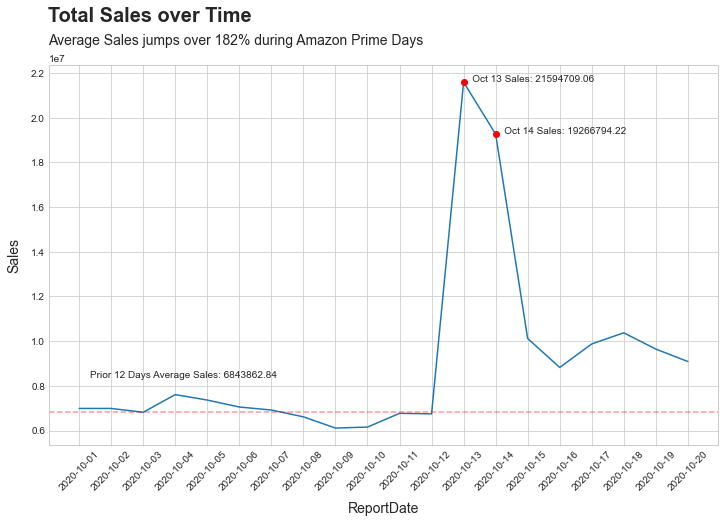

In [378]:
plt.figure(figsize=(12, 7))
plt.suptitle('Total Sales over Time',size=20, ha='right', x = 0.36, y = 0.995, fontweight = 'bold')
plt.title('Average Sales jumps over 182% during Amazon Prime Days'
          , size = 14, pad=20, ha='right', x= 0.56)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Sales', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="Sales", 
             data=temp_df); 

plt.xticks(rotation = 45);

## Plotting Oct 13 and Oct 14 values
plt.plot('2020-10-13',temp_df[temp_df['ReportDate']=='2020-10-13'].Sales, 'ro')
plt.text('2020-10-13', temp_df[temp_df['ReportDate']=='2020-10-13'].Sales+2500
         , '   Oct 13 Sales: ' + str(temp_df[temp_df['ReportDate']=='2020-10-13'].Sales.values[0]))

plt.plot('2020-10-14',temp_df[temp_df['ReportDate']=='2020-10-14'].Sales, 'ro')
plt.text('2020-10-14', temp_df[temp_df['ReportDate']=='2020-10-14'].Sales+2500
         , '   Oct 14 Sales: ' + str(temp_df[temp_df['ReportDate']=='2020-10-14'].Sales.values[0]))

## Plotting Prior 12 Days Average
plt.axhline(y=temp_df[:12].Sales.mean(), color = 'r', linestyle='--', alpha = 0.40)
plt.text('2020-10-01',  temp_df[:12].Sales.mean() + 1500000
         ,'    Prior 12 Days Average Sales: ' + str('%.2f' %  temp_df[:12].Sales.mean()));


#### By Marketplace

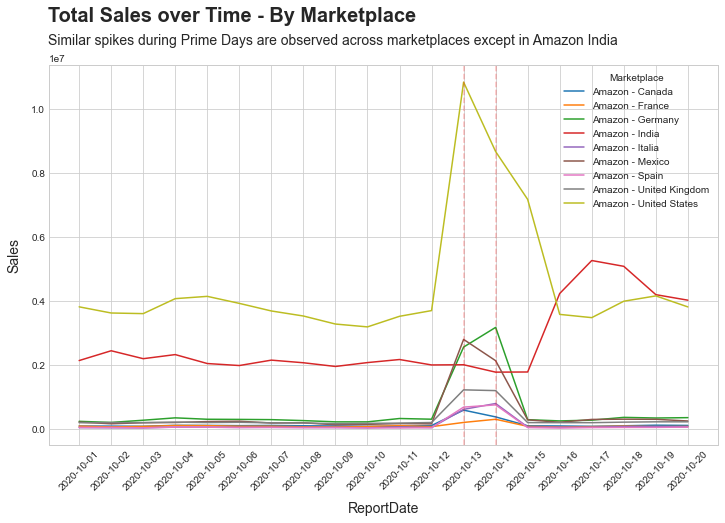

In [393]:
plt.figure(figsize=(12, 7))
plt.suptitle('Total Sales over Time - By Marketplace',size=20, ha='right', x = 0.55, y = 0.995, fontweight = 'bold')
plt.title('Similar spikes during Prime Days are observed across marketplaces except in Amazon India'
          , size = 14, pad=20, ha='right', x= 0.85)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Sales', size = 14, labelpad=10)

temp = pd.DataFrame(df_sales_.groupby(by=['ReportDate','Marketplace'])['Sales'].sum()).reset_index();
sns.lineplot(x='ReportDate',y='Sales', hue='Marketplace', data = temp);

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.xticks(rotation = 45);

In [409]:
temp_ = pd.DataFrame(df_sales_.groupby(by=['ReportDate','Marketplace'])['Sales'].sum()).reset_index()
temp_.head()

,ReportDate,Marketplace,Sales
0,2020-10-01,Amazon - Canada,106643.86
1,2020-10-01,Amazon - France,103332.88
2,2020-10-01,Amazon - Germany,252540.71
3,2020-10-01,Amazon - India,2147453.82
4,2020-10-01,Amazon - Italia,55943.54


In [421]:
temp_[temp_.ReportDate >= '2020-10-13'][temp_.ReportDate <= '2020-10-14'].groupby('Marketplace')['Sales'].mean()

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/2329968670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_[temp_.ReportDate >= '2020-10-13'][temp_.ReportDate <= '2020-10-14'].groupby('Marketplace')['Sales'].mean()


Marketplace
Amazon - Canada             496311.375
Amazon - France             267401.955
Amazon - Germany           2874785.790
Amazon - India             1901379.625
Amazon - Italia             716863.815
Amazon - Mexico            2474893.210
Amazon - Spain              730761.365
Amazon - United Kingdom    1222269.225
Amazon - United States     9746085.280
Name: Sales, dtype: float64

In [440]:
df_1 = pd.DataFrame(temp_[temp_.ReportDate <= '2020-10-12'].groupby('Marketplace')['Sales'].mean())
df_1

,Sales
Marketplace,
Amazon - Canada,"112,041.52"
Amazon - France,"97,106.33"
Amazon - Germany,"288,423.49"
Amazon - India,"2,138,625.28"
Amazon - Italia,"61,489.12"
Amazon - Mexico,"199,776.93"
Amazon - Spain,"58,581.89"
Amazon - United Kingdom,"207,454.12"
Amazon - United States,"3,680,364.15"


In [441]:
df_2 = pd.DataFrame(temp_[temp_.ReportDate >= '2020-10-13']
                    [temp_.ReportDate <= '2020-10-14'].groupby('Marketplace')['Sales'].mean())
df_2

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/1523967417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = pd.DataFrame(temp_[temp_.ReportDate >= '2020-10-13']


,Sales
Marketplace,
Amazon - Canada,"496,311.38"
Amazon - France,"267,401.95"
Amazon - Germany,"2,874,785.79"
Amazon - India,"1,901,379.62"
Amazon - Italia,"716,863.81"
Amazon - Mexico,"2,474,893.21"
Amazon - Spain,"730,761.36"
Amazon - United Kingdom,"1,222,269.23"
Amazon - United States,"9,746,085.28"


In [442]:
pd.options.display.float_format = "{:,.2f}".format
combined_df = df_1.join(df_2, lsuffix = ' (Pre-Prime)', rsuffix = ' (Prime)')
combined_df['% diff'] = (combined_df['Sales (Prime)'] - 
                         combined_df['Sales (Pre-Prime)'])/combined_df['Sales (Pre-Prime)']
combined_df

,Sales (Pre-Prime),Sales (Prime),% diff
Marketplace,,,
Amazon - Canada,"112,041.52","496,311.38",3.43
Amazon - France,"97,106.33","267,401.95",1.75
Amazon - Germany,"288,423.49","2,874,785.79",8.97
Amazon - India,"2,138,625.28","1,901,379.62",-0.11
Amazon - Italia,"61,489.12","716,863.81",10.66
Amazon - Mexico,"199,776.93","2,474,893.21",11.39
Amazon - Spain,"58,581.89","730,761.36",11.47
Amazon - United Kingdom,"207,454.12","1,222,269.23",4.89
Amazon - United States,"3,680,364.15","9,746,085.28",1.65


### Quantity over Time

#### Overall

In [366]:
temp_df = pd.DataFrame(df_sales_.groupby(by='ReportDate')['Quantity'].sum()).reset_index()

diff_mean = temp_df[13:14].mean() - temp_df[:12]['Quantity'].mean()
diff_mean_percent = (temp_df[13:14].mean() - temp_df[:12]['Quantity'].mean())/temp_df[:12]['Quantity'].mean()

print('Difference in Quantity: %.2f' % diff_mean);
print('Difference in Quantity (pct): %.2f' % (diff_mean_percent*100), '%');

Difference in Quantity: 222967.00
Difference in Quantity (pct): 142.74 %


/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3679496983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_mean = temp_df[13:14].mean() - temp_df[:12]['Quantity'].mean()
/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3679496983.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_mean_percent = (temp_df[13:14].mean() - temp_df[:12]['Quantity'].mean())/temp_df[:12]['Quantity'].mean()


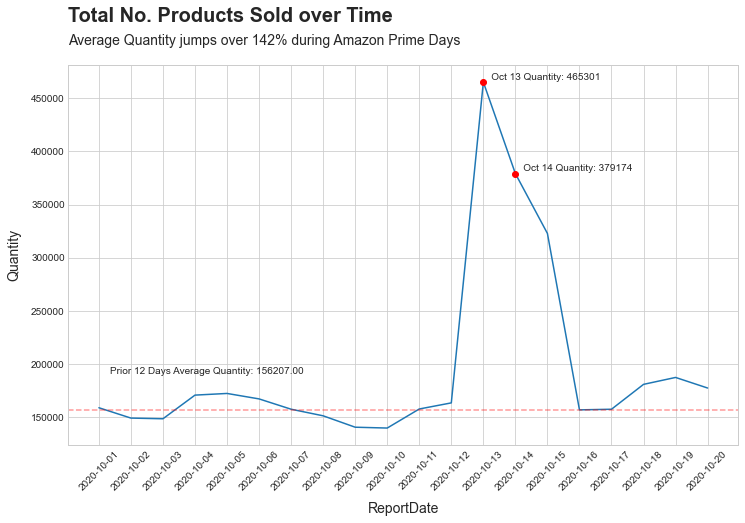

In [372]:
plt.figure(figsize=(12, 7))
# plt.suptitle('Quantity over Time',size=20)
# plt.title('Total No. Products Sold across Marketplaces from Oct 1-20, 2020', size = 14, pad=20)

plt.suptitle('Total No. Products Sold over Time',size=20, ha='right', x = 0.50, y = 0.995, fontweight = 'bold')
plt.title('Average Quantity jumps over 142% during Amazon Prime Days'
          , size = 14, pad=20, ha='right', x= 0.585)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Quantity', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="Quantity", 
             data= temp_df
             , markers = True); 

plt.xticks(rotation = 45);


## Plotting Oct 13 and Oct 14 values
plt.plot('2020-10-13',temp_df[temp_df['ReportDate']=='2020-10-13'].Quantity, 'ro')
plt.text('2020-10-13', temp_df[temp_df['ReportDate']=='2020-10-13'].Quantity+2500
         , '   Oct 13 Quantity: ' + str(temp_df[temp_df['ReportDate']=='2020-10-13'].Quantity.values[0]))

plt.plot('2020-10-14',temp_df[temp_df['ReportDate']=='2020-10-14'].Quantity, 'ro')
plt.text('2020-10-14', temp_df[temp_df['ReportDate']=='2020-10-14'].Quantity+2500
         , '   Oct 14 Quantity: ' + str(temp_df[temp_df['ReportDate']=='2020-10-14'].Quantity.values[0]))

## Plotting Prior 12 Days Average
plt.axhline(y=temp_df[:12].Quantity.mean(), color = 'r', linestyle='--', alpha = 0.40)
plt.text('2020-10-01',  temp_df[:12].Quantity.mean() + 35000
         ,'    Prior 12 Days Average Quantity: ' + str('%.2f' %  temp_df[:12].Quantity.mean()));

#### By Marketplace

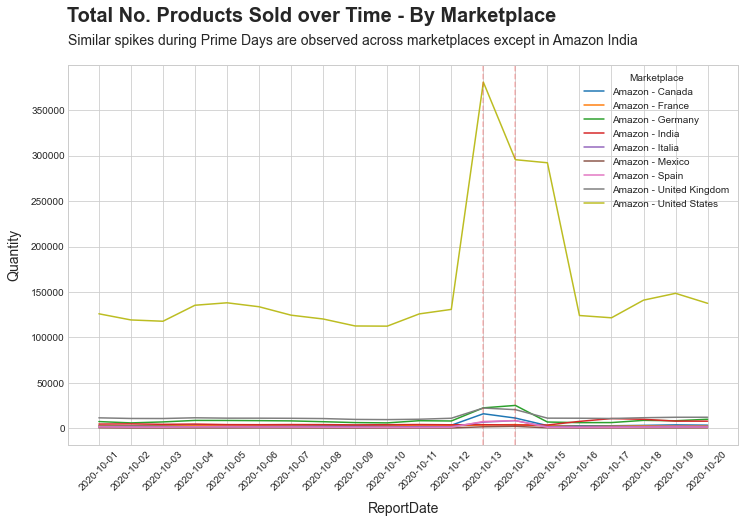

In [459]:
plt.figure(figsize=(12, 7))
plt.suptitle('Total No. Products Sold over Time - By Marketplace',size=20, ha='right', x = 0.69, y = 0.995, fontweight = 'bold')
plt.title('Similar spikes during Prime Days are observed across marketplaces except in Amazon India'
          , size = 14, pad=20, ha='right', x= 0.85)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Quantity', size = 14, labelpad=10)

temp = pd.DataFrame(df_sales_.groupby(by=['ReportDate','Marketplace'])['Quantity'].sum()).reset_index();
sns.lineplot(x='ReportDate',y='Quantity', hue='Marketplace', data = temp);

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.xticks(rotation = 45);

In [444]:
temp_ = pd.DataFrame(df_sales_.groupby(by=['ReportDate','Marketplace'])['Quantity'].sum()).reset_index()
temp_.head()

df_1 = pd.DataFrame(temp_[temp_.ReportDate <= '2020-10-12'].groupby('Marketplace')['Quantity'].mean())
df_1

df_2 = pd.DataFrame(temp_[temp_.ReportDate >= '2020-10-13']
                    [temp_.ReportDate <= '2020-10-14'].groupby('Marketplace')['Quantity'].mean())
df_2

pd.options.display.float_format = "{:,.2f}".format
combined_df = df_1.join(df_2, lsuffix = ' (Pre-Prime)', rsuffix = ' (Prime)')
combined_df['% diff'] = (combined_df['Quantity (Prime)'] - 
                         combined_df['Quantity (Pre-Prime)'])/combined_df['Quantity (Pre-Prime)']
combined_df

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/2686932692.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = pd.DataFrame(temp_[temp_.ReportDate >= '2020-10-13']


,Quantity (Pre-Prime),Quantity (Prime),% diff
Marketplace,,,
Amazon - Canada,"3,102.83","13,632.00",3.39
Amazon - France,"2,525.50","3,884.50",0.54
Amazon - Germany,"7,512.75","23,834.00",2.17
Amazon - India,"4,211.58","3,789.00",-0.10
Amazon - Italia,"1,752.17","7,614.00",3.35
Amazon - Mexico,365.75,"1,897.00",4.19
Amazon - Spain,"1,269.83","8,008.00",5.31
Amazon - United Kingdom,"10,756.17","21,395.50",0.99
Amazon - United States,"124,710.42","338,183.50",1.71


### Distribution By Hour

#### Total Sales By Hour

In [445]:
df_sales_.head()

,AccountId,Marketplace,Orders,ProductId,Quantity,ReportDate,Sales,TimeId,Hour,Minute,Seconds
0,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072757000,1,2020-10-01,8.80,62746,17,25,46
1,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072649175,1,2020-10-01,20.99,62746,17,25,46
2,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,5,-1072649173,5,2020-10-01,49.95,62746,17,25,46
3,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Italia,1,-1072643743,3,2020-10-01,44.70,62746,17,25,46
4,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - United Kingdom,1,-1072638147,1,2020-10-01,7.99,62742,17,25,42


In [636]:
## Creating DataFrames separating each day, hour
store_df = {}
for i in range(24):
    if str(i) in df_sales_.Hour.unique():
        store_df["hr_{}".format(str(i))] = pd.DataFrame(df_sales_[df_sales_.Hour == str(i)].groupby(['ReportDate','Hour']).Sales.sum())
        store_df["hr_{}".format(str(i))]["hr_{}".format(str(i))] = store_df["hr_{}".format(str(i))]['Sales']
        
        
        

In [640]:
## Combining the Hourly DataFrames
base_dates = pd.DataFrame({'dates':
                          pd.date_range('2020-10-01', periods=20, freq='1d').strftime('%Y-%m-%d').values.tolist()}
                         )

dates_mat_df = base_dates
for i in range(24):
    if str(i) in df_sales_.Hour.unique():

        dates_mat_df = dates_mat_df.merge(
            store_df["hr_{}".format(str(i))][["hr_{}".format(str(i))]]
            , left_on='dates'
            , right_on = 'ReportDate'
            , how='left')

dates_mat_df

,dates,hr_17,hr_18,hr_19,hr_20,hr_21
0,2020-10-01,"6,988,298.93",NaN,NaN,NaN,NaN
1,2020-10-02,"6,988,365.49",NaN,NaN,NaN,NaN
2,2020-10-03,"6,816,967.84",NaN,NaN,NaN,NaN
3,2020-10-04,NaN,"7,607,707.50",NaN,NaN,NaN
4,2020-10-05,NaN,"7,363,057.81",NaN,NaN,NaN
5,2020-10-06,NaN,"7,052,337.85",NaN,NaN,NaN
6,2020-10-07,NaN,"6,917,373.23",NaN,NaN,NaN
7,2020-10-08,NaN,"6,612,564.65",NaN,NaN,NaN
8,2020-10-09,NaN,NaN,"6,111,042.77",NaN,NaN
9,2020-10-10,NaN,NaN,"6,153,940.76",NaN,NaN


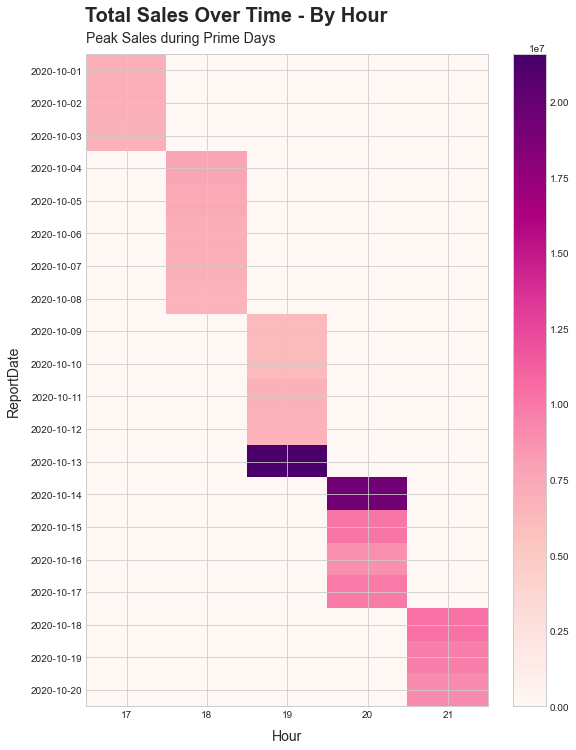

In [641]:
## Visualizing the Distribution
plt.figure(figsize=(9, 12))
plt.suptitle('Total Sales Over Time - By Hour',size=20, ha='right', x = 0.59, y = 0.935, fontweight = 'bold')
plt.title('Peak Sales during Prime Days'
          , size = 14, pad=12, ha='right', x= 0.47)


plt.xlabel('Hour', size = 14, labelpad = 10)
plt.ylabel('ReportDate', size = 14, labelpad=10)
plt.imshow(dates_mat_df.set_index('dates').fillna(0),cmap="RdPu",aspect='auto', interpolation='nearest')
plt.colorbar()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

plt.xticks(np.arange(0, 5,1),['17','18','19','20','21'])
plt.yticks(np.arange(0, 20,1),list(base_dates.dates))


plt.show()



#### Total Products Sold By Hour

In [642]:
df_sales_.head()

,AccountId,Marketplace,Orders,ProductId,Quantity,ReportDate,Sales,TimeId,Hour,Minute,Seconds
0,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072757000,1,2020-10-01,8.80,62746,17,25,46
1,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,1,-1072649175,1,2020-10-01,20.99,62746,17,25,46
2,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Germany,5,-1072649173,5,2020-10-01,49.95,62746,17,25,46
3,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - Italia,1,-1072643743,3,2020-10-01,44.70,62746,17,25,46
4,2890B6D04EA4AB33B50FBEF097DF3521,Amazon - United Kingdom,1,-1072638147,1,2020-10-01,7.99,62742,17,25,42


In [643]:
## Creating DataFrames separating each day, hour
store_df = {}
for i in range(24):
    if str(i) in df_sales_.Hour.unique():
        store_df["hr_{}".format(str(i))] = pd.DataFrame(df_sales_[df_sales_.Hour == str(i)].groupby(['ReportDate','Hour']).Quantity.sum())
        store_df["hr_{}".format(str(i))]["hr_{}".format(str(i))] = store_df["hr_{}".format(str(i))]['Quantity']
        
 ## Combining the Hourly DataFrames
base_dates = pd.DataFrame({'dates':
                          pd.date_range('2020-10-01', periods=20, freq='1d').strftime('%Y-%m-%d').values.tolist()}
                         )

dates_mat_df = base_dates
for i in range(24):
    if str(i) in df_sales_.Hour.unique():

        dates_mat_df = dates_mat_df.merge(
            store_df["hr_{}".format(str(i))][["hr_{}".format(str(i))]]
            , left_on='dates'
            , right_on = 'ReportDate'
            , how='left')

dates_mat_df       
        

,dates,hr_17,hr_18,hr_19,hr_20,hr_21
0,2020-10-01,"158,669.00",NaN,NaN,NaN,NaN
1,2020-10-02,"148,924.00",NaN,NaN,NaN,NaN
2,2020-10-03,"148,283.00",NaN,NaN,NaN,NaN
3,2020-10-04,NaN,"170,559.00",NaN,NaN,NaN
4,2020-10-05,NaN,"172,123.00",NaN,NaN,NaN
5,2020-10-06,NaN,"166,981.00",NaN,NaN,NaN
6,2020-10-07,NaN,"157,274.00",NaN,NaN,NaN
7,2020-10-08,NaN,"151,060.00",NaN,NaN,NaN
8,2020-10-09,NaN,NaN,"140,332.00",NaN,NaN
9,2020-10-10,NaN,NaN,"139,545.00",NaN,NaN


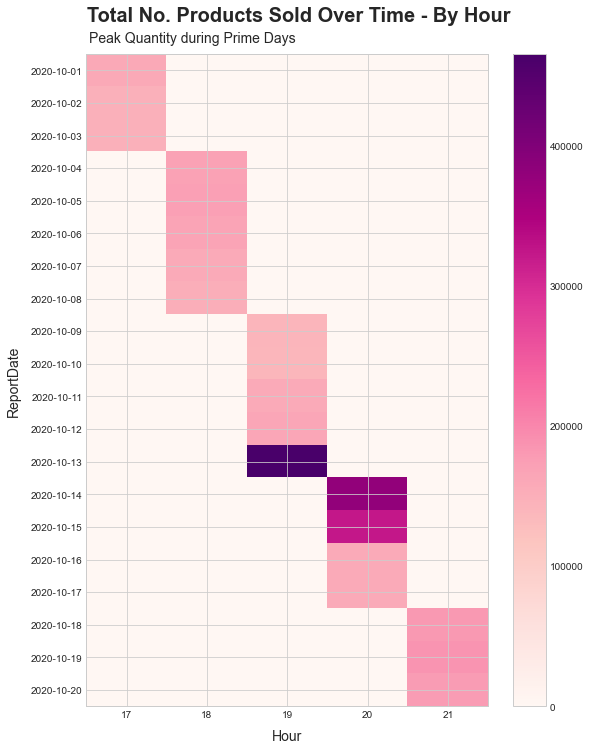

In [653]:
## Visualizing the Distribution
plt.figure(figsize=(9, 12))
plt.suptitle('Total No. Products Sold Over Time - By Hour',size=20, ha='right', x = 0.78, y = 0.935, fontweight = 'bold')
plt.title('Peak Quantity during Prime Days'
          , size = 14, pad=12, ha='right', x= 0.52)


plt.xlabel('Hour', size = 14, labelpad = 10)
plt.ylabel('ReportDate', size = 14, labelpad=10)
plt.imshow(dates_mat_df.set_index('dates').fillna(0),cmap="RdPu",aspect='auto', interpolation='nearest')
plt.colorbar()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

plt.xticks(np.arange(0, 5,1),['17','18','19','20','21'])
plt.yticks(np.arange(0, 20,1),list(base_dates.dates))

plt.show()

## Is advertising worth it for this kind of event? (Using Advertising-Oct-2020 table)

In [909]:
df_ads_.head()

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-12,0.00,SponsoredBrands,71072,0.00,19,44,32
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71821,0.00,19,57,01
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-14,0.00,SponsoredBrands,72577,0.00,20,09,37
3,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-15,0.00,SponsoredBrands,73326,0.00,20,22,06
4,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-16,0.00,SponsoredBrands,74082,0.00,20,34,42


### Generating metrics 
The following are metrics we can calculate using the given data for each of the accounts. 

In [910]:
## Calculating Cost Per Click
df_ads_['CPC'] = df_ads_['Costs']/df_ads_['Clicks']

## Calculating Click Through Rate
df_ads_['CTR'] = df_ads_['Clicks']/df_ads_['Impressions']

## Calculating Conversion Rate
df_ads_['CR'] = df_ads_['UnitsSold']/df_ads_['Clicks']

## Calculating Return on Advertisting Spend
df_ads_['ROAS'] = df_ads_['Sales']/df_ads_['Costs']

## Calculating Advertisting Cost of Sales
df_ads_['ACOS'] = df_ads_['Costs']/df_ads_['Sales']

### Dividing the data into splits following pre, on, and post Prime days

In [911]:
pre_prime = df_ads_[df_ads_['ReportDate']<'2020-10-13']
on_prime = df_ads_[df_ads_['ReportDate']>='2020-10-13'][df_ads_['ReportDate']<='2020-10-14']
post_prime = df_ads_[df_ads_['ReportDate']>'2020-10-14']

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3081350401.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  on_prime = df_ads_[df_ads_['ReportDate']>='2020-10-13'][df_ads_['ReportDate']<='2020-10-14']


In [912]:
## Querying for Prime Days
on_prime.head()

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds,CPC,CTR,CR,ROAS,ACOS
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71821,0.00,19,57,01,NaN,NaN,NaN,NaN,NaN
2,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-14,0.00,SponsoredBrands,72577,0.00,20,09,37,NaN,NaN,NaN,NaN,NaN
11,685C38C40E63205C75D4226CB737E7F5,Amazon - United States,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71823,0.00,19,57,03,NaN,NaN,NaN,NaN,NaN
12,685C38C40E63205C75D4226CB737E7F5,Amazon - Canada,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71823,0.00,19,57,03,NaN,NaN,NaN,NaN,NaN
13,685C38C40E63205C75D4226CB737E7F5,Amazon - United States,0.00,0.00,0.00,2020-10-14,0.00,SponsoredBrands,72579,0.00,20,09,39,NaN,NaN,NaN,NaN,NaN


### Quick EDA

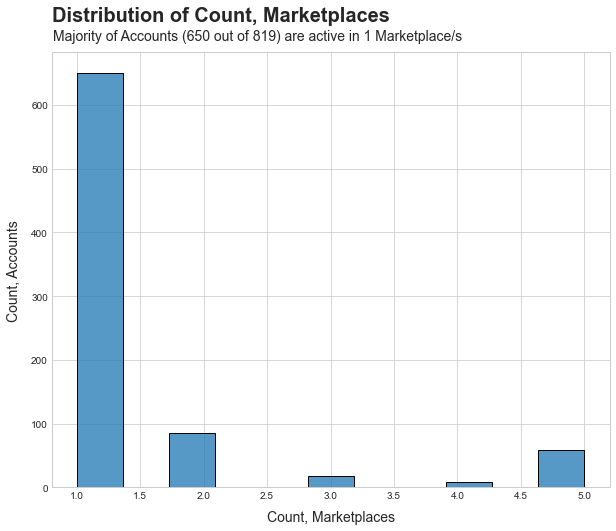

In [913]:
# Plotting Distribution of Marketplaces
temp_by_acct = pd.DataFrame(df_ads_.groupby(['AccountId'])['Marketplace'].nunique())

## Visualizing the Distribution
plt.figure(figsize=(10, 8))
plt.suptitle('Distribution of Count, Marketplaces',size=20, ha='right', x = 0.595, y = 0.96, fontweight = 'bold')
plt.title('Majority of Accounts ({} out of {}) are active in {} Marketplace/s'
          .format(temp_by_acct.value_counts().iloc[0]
                 , temp_by_acct.value_counts().sum()
                 , temp_by_acct.value_counts().index[0][0])
          , size = 14, pad=12, ha='right', x= 0.735)


plt.xlabel('Count, Marketplaces', size = 14, labelpad = 10)
plt.ylabel('Count, Accounts', size = 14, labelpad=10)

sns.histplot(data=temp_by_acct, x = 'Marketplace');

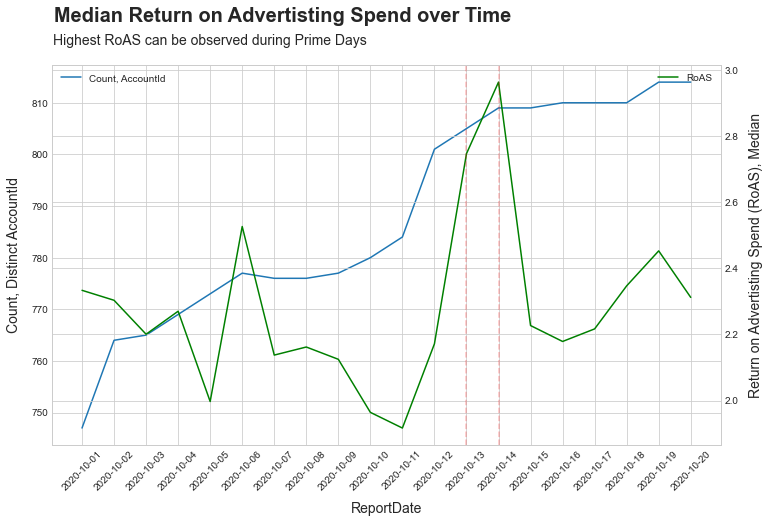

In [1040]:
plt.figure(figsize=(12, 7))
plt.suptitle('Median Return on Advertisting Spend over Time',size=20, ha='right', x = 0.657, y = 0.995, fontweight = 'bold')
plt.title('Highest RoAS can be observed during Prime Days'
          , size = 14, pad=20, ha='right', x= 0.47)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Count, Distinct AccountId', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="AccountId", 
             data=pd.DataFrame(df_ads_.groupby('ReportDate')['AccountId'].nunique()),
            label = 'Count, AccountId'); 

plt.xticks(rotation = 45);

## Plotting Secondary Y-Axis
ax2 = plt.twinx()
sns.lineplot(x="ReportDate", y="ROAS", color ='g',
             data=pd.DataFrame(df_ads_[df_ads_['Costs']>0].groupby('ReportDate')['ROAS'].median()),
             label = 'RoAS', ax=ax2); 

ax2.set_ylabel('Return on Advertisting Spend (RoAS), Median', size = 14, labelpad=10)

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.legend()
plt.xticks(rotation = 45);

In [968]:
df_ads_.head(2)

,AccountId,Marketplace,Clicks,Costs,Impressions,ReportDate,Sales,SponsoredType,TimeId,UnitsSold,Hour,Minute,Seconds,CPC,CTR,CR,ROAS,ACOS
0,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-12,0.00,SponsoredBrands,71072,0.00,19,44,32,NaN,NaN,NaN,NaN,NaN
1,4DF6CD34CE9180A9C4FF6AF49EFABCC4,Amazon - United Kingdom,0.00,0.00,0.00,2020-10-13,0.00,SponsoredBrands,71821,0.00,19,57,01,NaN,NaN,NaN,NaN,NaN


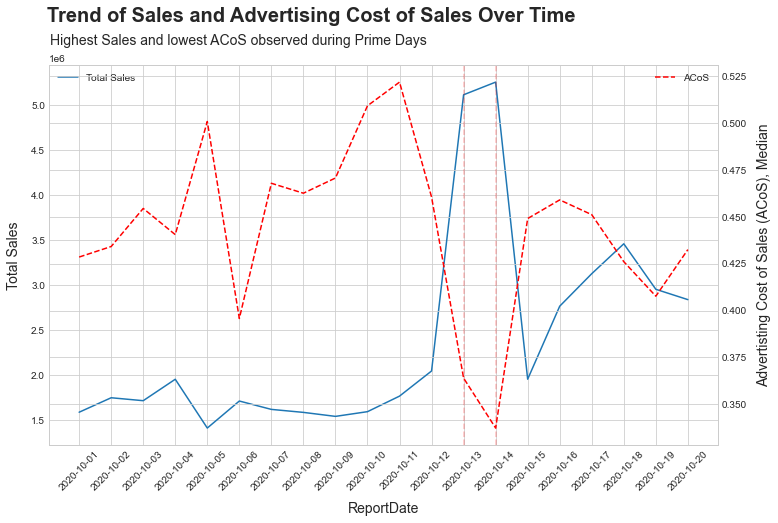

In [1041]:
plt.figure(figsize=(12, 7))
plt.suptitle('Trend of Sales and Advertising Cost of Sales Over Time',size=20, ha='right', x = 0.735, y = 0.995, fontweight = 'bold')
plt.title('Highest Sales and lowest ACoS observed during Prime Days'
          , size = 14, pad=20, ha='right', x= 0.565)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Total Sales', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="Sales", 
             data=pd.DataFrame(df_ads_.groupby('ReportDate')['Sales'].sum()),
             label = 'Total Sales'); 
plt.legend(loc='upper left')

plt.xticks(rotation = 45);

## Plotting Secondary Y-Axis
ax2 = plt.twinx()
sns.lineplot(x="ReportDate", y="ACOS", color ='r',
             data=pd.DataFrame(df_ads_[df_ads_['Costs']>0].groupby('ReportDate')['ACOS'].median()),
             label = 'ACoS', ax=ax2); 

ax2.set_ylabel('Advertisting Cost of Sales (ACoS), Median', size = 14, labelpad=10)
ax2.lines[0].set_linestyle("--")

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.legend()
plt.xticks(rotation = 45);

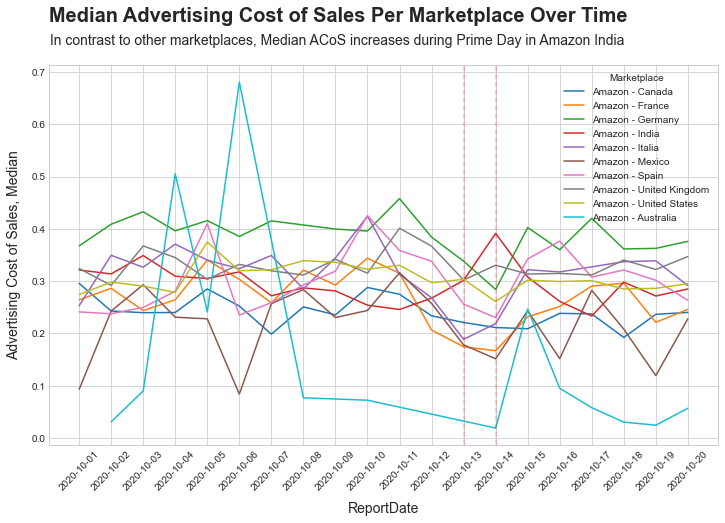

In [1039]:
plt.figure(figsize=(12, 7))
plt.suptitle('Median Advertising Cost of Sales Per Marketplace Over Time',size=20, ha='right', x = 0.795, y = 0.995, fontweight = 'bold')
plt.title('In contrast to other marketplaces, Median ACoS increases during Prime Day in Amazon India'
          , size = 14, pad=20, ha='right', x= 0.86)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Advertising Cost of Sales, Median', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="ACOS", color ='r',
             data=pd.DataFrame(df_ads_[df_ads_['Sales']>0].groupby(by = ['ReportDate','Marketplace'])['ACOS'].median()).reset_index(),
             hue='Marketplace'); 

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.xticks(rotation = 45);

### Calculating Return on Advertisting Spend

In [1046]:
## Assigning Periods

period = []
for i in range(len(df_ads_)):
    if df_ads_['ReportDate'][i] < '2020-10-13':
        period.append('pre_prime')
    elif df_ads_['ReportDate'][i] >= '2020-10-13' and df_ads_['ReportDate'][i] <= '2020-10-14':
        period.append('on_prime')
    elif df_ads_['ReportDate'][i] > '2020-10-14':
        period.append('post_prime')
    else:
        pass

df_ads_['Period'] = period

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/279710554.py:7: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.axis((0,0,0,25))


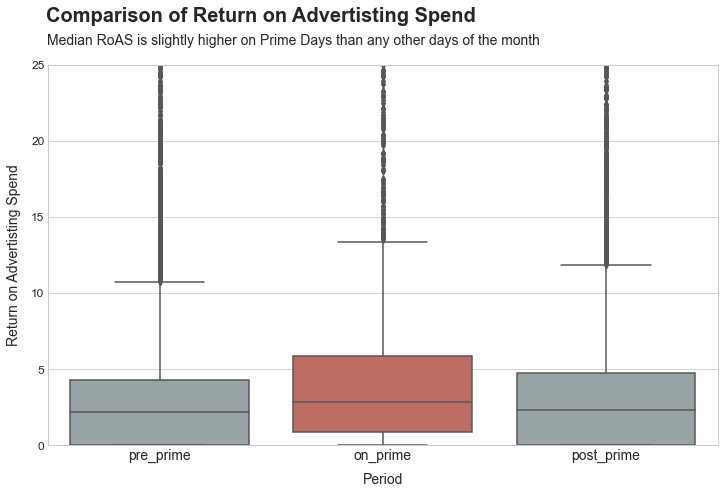

In [1119]:
plt.figure(figsize=(12, 7))
plt.suptitle('Comparison of Return on Advertisting Spend',size=20, ha='right', x = 0.62, y = 0.995, fontweight = 'bold')
plt.title('Median RoAS is slightly higher on Prime Days than any other days of the month'
          , size = 14, pad=20, ha='right', x= 0.735)

x1,x2,y1,y2 = plt.axis()  
plt.axis((0,0,0,25))

custom_pal = {period: "#CD6155" if period == "on_prime" else "#95A5A6" for period in df_ads_.Period.unique()}

sns.boxplot(x='Period',y='ROAS', data=df_ads_,palette=custom_pal);

plt.xlabel('Period', size = 14, labelpad = 10)
plt.ylabel('Return on Advertisting Spend', size = 14, labelpad=10);
plt.xticks(size = 14);
plt.yticks(size = 12);




In [1116]:
roas_calc_df = df_ads_[df_ads_['Costs']>0].groupby('Period')['ROAS'].describe().transpose()
roas_calc_df[['pre_prime','on_prime','post_prime']]

Period,pre_prime,on_prime,post_prime
count,"9,552.00","2,302.00","6,854.00"
mean,4.25,5.59,4.93
std,18.25,12.89,14.17
min,0.00,0.00,0.00
25%,0.00,0.86,0.00
50%,2.17,2.82,2.29
75%,4.28,5.82,4.72
max,"1,517.33",383.17,483.17


--- 
**Reference:** https://latana.com/post/measure-campaign-effectiveness/

Thus, marketers that don’t have such a tool in place leverage online advertising metrics — which are proxy and/or complementary to the above, such as:

- Impressions (ad views): the number of times your ad is shown to the viewer.

- Click-through-rate (CTR): the percentage of times your ad gets clicked when on display.

- Cost per click (CPC): the monetary value you are paying for each click or another type of action (e.g. conversion, sale, etc).

- Conversion rate: the percentage of times your ads leads to a desired action (e.g. a sale or a subscription)

- Return on ad spend (ROAS): the amount of revenue you earn for each dollar spent on ads.

- Social media sentiment: the attitude and feelings people bring up on social networks.

- Earned mentions: the number of brand mentions and links, organically acquired from online publishers.

**Reference:** https://support.google.com/google-ads/answer/2615875?hl=en  

Clickthrough rate (CTR): Definition
A ratio showing how often people who see your ad or free product listing end up clicking it. Clickthrough rate (CTR) can be used to gauge how well your keywords and ads, and free listings, are performing.

CTR is the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR. For example, if you had 5 clicks and 100 impressions, then your CTR would be 5%.
Each of your ads, listings, and keywords have their own CTRs that you can see listed in your account.
A high CTR is a good indication that users find your ads and listings helpful and relevant. CTR also contributes to your keyword's expected CTR, which is a component of Ad Rank. Note that a good CTR is relative to what you're advertising and on which networks.
You can use CTR to gauge which ads, listings, and keywords are successful for you and which need to be improved. The more your keywords, ads, and listings relate to each other and to your business, the more likely a user is to click on your ad or listing after searching on your keyword phrase.

## Which kind of advertising (SponsoredType) worked best in Prime Day 2020? (You can use Advertising Cost of Sales for this)

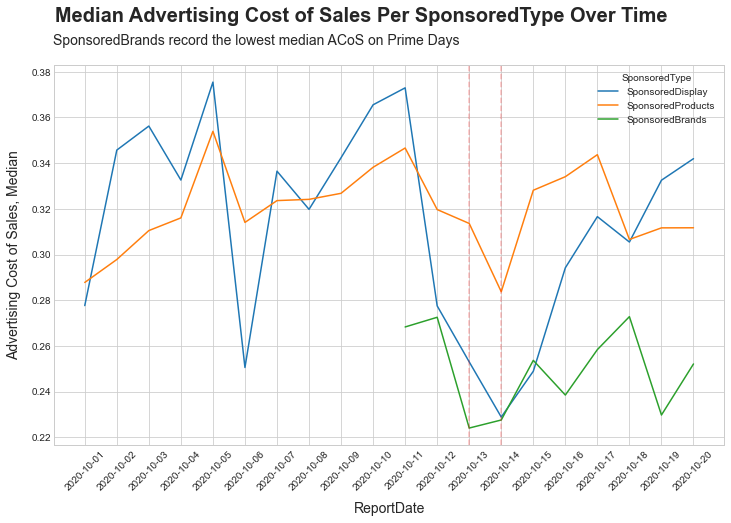

In [1124]:
plt.figure(figsize=(12, 7))
plt.suptitle('Median Advertising Cost of Sales Per SponsoredType Over Time',size=20, ha='right', x = 0.835, y = 0.995, fontweight = 'bold')
plt.title('SponsoredBrands record the lowest median ACoS on Prime Days'
          , size = 14, pad=20, ha='right', x= 0.605)


plt.xlabel('ReportDate', size = 14, labelpad = 10)
plt.ylabel('Advertising Cost of Sales, Median', size = 14, labelpad=10)

sns.lineplot(x="ReportDate", y="ACOS", color ='r',
             data=pd.DataFrame(df_ads_[df_ads_['Sales']>0].groupby(by = ['ReportDate','SponsoredType'])['ACOS'].median()).reset_index(),
             hue='SponsoredType'); 

plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

plt.xticks(rotation = 45);

In [1154]:
color_pal = []
for i in df_ads_[df_ads_['Period']=='on_prime'].index:
    if df_ads_['SponsoredType'][i] == 'SponsoredBrands':
        color_pal.append('green')
    elif df_ads_['SponsoredType'][i] == 'SponsoredProducts':
        color_pal.append('red')
    elif df_ads_['SponsoredType'][i] == 'SponsoredDisplay':
        color_pal.append('blue')

    else:
        pass
color_pal[:5]

['green', 'green', 'green', 'green', 'green']

In [1171]:
# color_pal = []
# for i in df_ads_[df_ads_['Period']=='on_prime']['SponsoredType']:
#     if i == 'SponsoredBrands':
#         color_pal.append('blue')
#     elif i == 'SponsoredProducts':
#         color_pal.append('orange')
#     elif i == 'SponsoredDisplay':
#         color_pal.append('green')
#     else:
#         pass

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/2668379024.py:7: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.axis((0,0,0,5))
/Users/tristanjoshuaalba/datahawk/data-analyst-problem/env/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


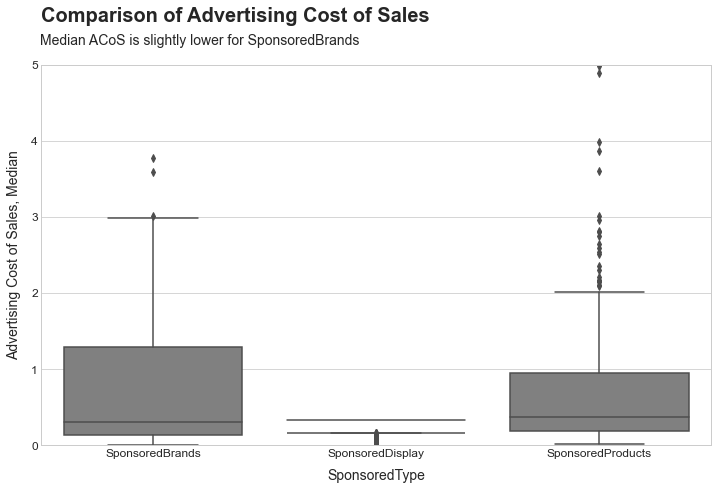

In [1184]:
plt.figure(figsize=(12, 7))
plt.suptitle('Comparison of Advertising Cost of Sales',size=20, ha='right', x = 0.575, y = 0.995, fontweight = 'bold')
plt.title('Median ACoS is slightly lower for SponsoredBrands'
          , size = 14, pad=20, ha='right', x= 0.475)

x1,x2,y1,y2 = plt.axis()  
plt.axis((0,0,0,5))

# custom_pal = {period: "#CD6155" if period == "on_prime" else "#95A5A6" for period in df_ads_.Period.unique()}



sns.boxplot(x='SponsoredType',y='ACOS', data=df_ads_[df_ads_['Period']=='on_prime'], color = 'gray');

plt.xlabel('SponsoredType', size = 14, labelpad = 10)
plt.ylabel('Advertising Cost of Sales, Median', size = 14, labelpad=10);
plt.xticks(size = 12);
plt.yticks(size = 12);



In [1187]:
## Before Prime Days
acos_calc_df = df_ads_[df_ads_['Period']=='pre_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()
acos_calc_df[['SponsoredBrands','SponsoredDisplay','SponsoredProducts']]

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/3942137589.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acos_calc_df = df_ads_[df_ads_['Period']=='pre_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()


SponsoredType,SponsoredBrands,SponsoredDisplay,SponsoredProducts
count,208.00,908.00,"5,976.00"
mean,0.40,0.63,0.50
std,0.44,1.14,0.85
min,0.00,0.00,0.00
25%,0.13,0.15,0.19
50%,0.27,0.32,0.32
75%,0.48,0.64,0.54
max,3.11,16.14,24.32


In [1186]:
## During Prime Days
acos_calc_df = df_ads_[df_ads_['Period']=='on_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()
acos_calc_df[['SponsoredBrands','SponsoredDisplay','SponsoredProducts']]

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/2171007423.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acos_calc_df = df_ads_[df_ads_['Period']=='on_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()


SponsoredType,SponsoredBrands,SponsoredDisplay,SponsoredProducts
count,502.00,247.00,"1,101.00"
mean,0.41,0.36,0.48
std,0.74,0.40,0.95
min,0.00,0.00,0.01
25%,0.11,0.13,0.16
50%,0.22,0.24,0.30
75%,0.45,0.42,0.51
max,10.57,2.39,20.02


In [1188]:
## After Prime Days
acos_calc_df = df_ads_[df_ads_['Period']=='post_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()
acos_calc_df[['SponsoredBrands','SponsoredDisplay','SponsoredProducts']]

/var/folders/8p/x8snysqj65s_0n4rq9gh9kgw0000gn/T/ipykernel_45087/1933511322.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acos_calc_df = df_ads_[df_ads_['Period']=='post_prime'][df_ads_['Sales']>0].groupby('SponsoredType')['ACOS'].describe().transpose()


SponsoredType,SponsoredBrands,SponsoredDisplay,SponsoredProducts
count,"1,353.00",566.00,"3,170.00"
mean,0.43,0.55,0.47
std,0.70,1.11,0.59
min,0.00,0.00,0.00
25%,0.12,0.14,0.19
50%,0.25,0.31,0.32
75%,0.47,0.58,0.53
max,9.05,20.65,9.32


# Summary

- **What is the impact of Prime Day on Sales? Quantity?**
    - Average Sales jumps over 182% during Prime Days
    - Average Quantity jumps over 142% during Prime Days
    - Similar spikes are observed during Prime Days across Marketplaces except in Amazon India (where average sales and quantity fell around 10% vs. pre-Prime Days)  
    
    
- **Is advertising worth it for this kind of event? (Using *Advertising-Oct-2020* table)**
    - Yes, it is worth it. Highest Sales and Highest Return on Advertising Spend (RoAS) can be observed during Prime Days. (Advertising Cost of Sales also drop proportionally)
    - Amazon India remains to be an oddball by being the only marketplace with a significant increase in Advertising Cost of Sales during Prime Days.
    - Median RoAS is slightly higher during Prime Days as compared to pre and post the event.  
    
    
- **Which kind of advertising (*SponsoredType*) worked best in Prime Day 2020? (You can use [Advertising Cost of Sales](https://datahawk.co/blog/amazon-acos-vs-roas#1) for this)**
    - SponsoredBrands worked best in Prime Day 2020.
    - Median ACoS is slightly lower for SponsoredBrands during Prime Days vs. other SponsoredTypes.  
 
 
- **Additional Insights:**
    - Sales data is either synthetic or uniformly sampled such that transactions for certain date ranges only fall within a specific time of day, and no overlaps with other date ranges. For example, sales data for Oct 1-3 only has records on 5 PM (or Hour = 17), sales data for Oct 4-8 has records on 6 PM (or Hour = 18), and so on.
    - Majority of Accounts (650 out of 819) are active in just one marketplace.
    - Date formats in the Sales and Advertising Data are different and requires preprocessing.
    - USA, Germany, and Mexico are the Top 3 biggest Marketplaces in terms of Sales.
    - USA, Germany, and UK are the Top 3 biggest Marketplaces in terms of Quantity Products Sold.

## Appendix

In [281]:
# sns.lineplot(x="ReportDate", y ="Sales",
#             data = pd.DataFrame(df_sales_.groupby(by='ReportDate')['Sales'].sum().rolling(7).mean()).reset_index())
# plt.axvline(x='2020-10-13', color='r', linestyle='--', alpha = 0.25)
# plt.axvline(x='2020-10-14', color='r', linestyle='--', alpha = 0.25)

## Plotting and Annotating Maximum Value
# ymax = max(temp_df.Sales)
# xpos = list(temp_df.Sales).index(ymax)
# xmax = temp_df.ReportDate[xpos]
# plt.plot(xmax, ymax, 'ro')
# plt.text(xmax, ymax+2500, '   Oct 13 Sales: ' + str(ymax))

In [460]:
# pivot = pd.DataFrame(df_sales_.groupby(['ReportDate','Hour']).Sales.sum()).pivot_table(
#     index=['ReportDate', 'Hour'], values=['Sales'], aggfunc='sum')
# pivot

In [ ]:
# hr_18 = pd.DataFrame(df_sales_[df_sales_.Hour == '18'].groupby(['ReportDate','Hour']).Sales.sum())
# hr_18['hh = 18'] = hr_18['Sales']
# hr_18.head()

In [ ]:
## Calculating Average ROAS during Prime Days
# df_ads_[df_ads_['ReportDate']>='10/13/2020'][df_ads_['ReportDate']<='10/14/2020']\
# [df_ads_['Costs']>0]['ROAS'].mean()

In [ ]:
## Calculating Average ROAS before Prime Days
# df_ads_[df_ads_['ReportDate']<'10/13/2020']\
# [df_ads_['Costs']>0]['ROAS'].mean()

In [ ]:
## Calculating Average ROAS After Prime Days
# df_ads_[df_ads_['ReportDate']>'10/14/2020']\
# [df_ads_['Costs']>0]['ROAS'].mean()